# Selective Search
<b> SelectiveSearch </b> is a region proposal algorithm used for object localization where it
generates proposals of regions that are likely to be grouped together based on their
pixel intensities. SelectiveSearch groups pixels based on the hierarchical grouping of
similar pixels, which, in turn, leverages the color, texture, size, and shape
compatibility of content within an image.

Initially, SelectiveSearch over-segments an image by grouping pixels based on the
preceding attributes. Next, it iterates through these over-segmented groups and
groups them based on similarity. At each iteration, it combines smaller regions to
form a larger region.

In [1]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=f443704eb9a82379396dedabe37ce3e88e32de8d81ccfc1418bd7185b2a53271
  Stored in directory: /home/lacie/.cache/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


/home/lacie/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2023-08-14 10:37:17--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-08-14 10:37:18--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba0e4c4c42009e523dbb1e45f2.dl.dropboxusercontent.com/cd/0/inline/CBxHmVpyCFDIDD4RPxt2BXthSzzVbiVNeybNXI2jv_KnMcFpubrgiTdVz_e7woCIlDUqrJApZf3URAyZPqnx8wFZDHIZa0XCNawJ3c2PLqlgMGLGU5xyel_JuNX78eeXWhA/file# [following]
--2023-08-14 10:37:19--  https://ucba0e4c4c42009e523dbb1e45f2.dl.dropboxusercontent.com/cd/0/inline/CBxHmVpyCFDIDD4RPxt2BXthSzzVbiVNeybNXI2jv_KnMcFpubrgiTdVz_e7woCIlDUqrJApZf3URAyZPqnx8wFZDHIZa0XCNawJ3c2PLqlgMGLGU5xyel_J

In [3]:
segments_fz = felzenszwalb(img, scale=200)

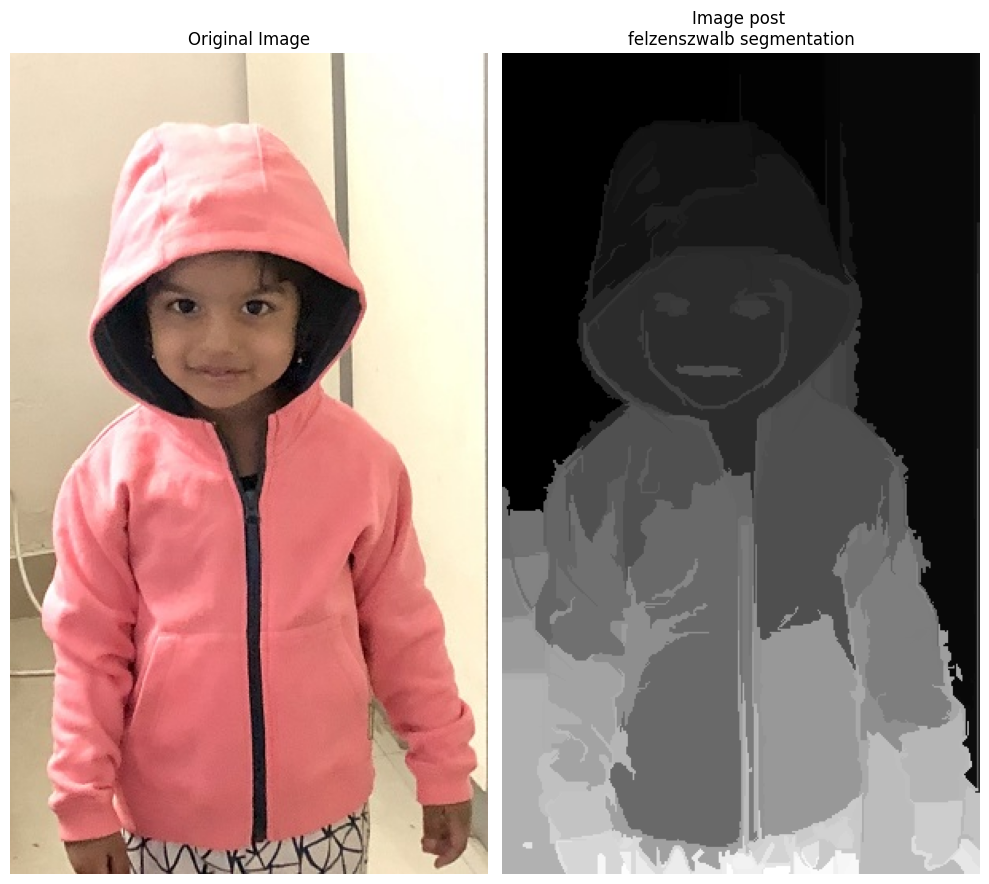

In [4]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [5]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [6]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2023-08-14 10:42:52--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-08-14 10:42:53--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc46fe84a01cf554c76e9e31812d.dl.dropboxusercontent.com/cd/0/inline/CBx36sYDz3Ndu9PR-KfSGSvmjOYqrHNt9Sy9AcApzLVrpaxPRCH5rd17FM2WzJz_lPtbqJpnzW1FDmaum624p7mcdeWWXSecKAueQpnevduJz-pzVZH7UW6b1sXX48jqIDk/file# [following]
--2023-08-14 10:42:54--  https://uc46fe84a01cf554c76e9e31812d.dl.dropboxusercontent.com/cd/0/inline/CBx36sYDz3Ndu9PR-KfSGSvmjOYqrHNt9Sy9AcApzLVrpaxPRCH5rd17FM2WzJz_lPtbqJpnzW1FDmaum624p7mcdeWWXSecKAueQpnevduJz-pzVZH7UW6b

/home/lacie/miniconda3/envs/conda-pytorch/lib/python3.8/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


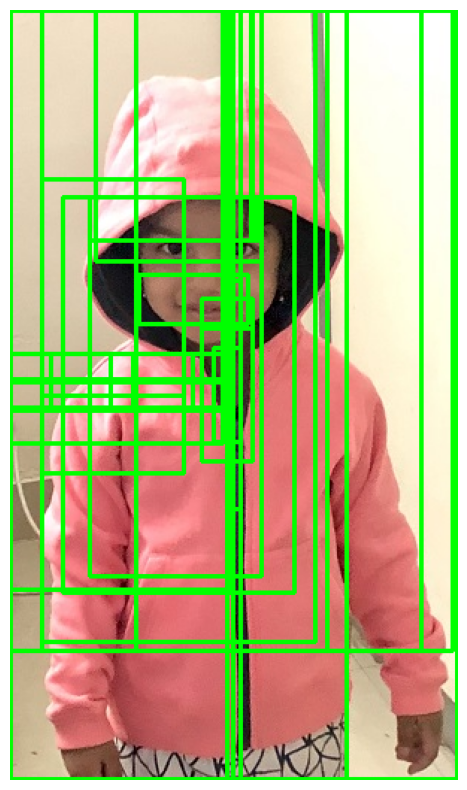

In [7]:
candidates = extract_candidates(img)
show(img, bbs = candidates)